In [4]:
from google.colab import files

# This will open a file dialog for you to select and upload your zipped file
uploaded = files.upload()

Saving Egg Quality Grading.v1i.yolov5pytorch (1).zip to Egg Quality Grading.v1i.yolov5pytorch (1).zip


In [5]:
import zipfile
import os

# Replace with the exact name of your uploaded file (you can check this by running the previous cell)
zip_file_path = "/content/Egg Quality Grading.v1i.yolov5pytorch (1).zip"

# Unzip the uploaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List the extracted files to verify
extracted_files = os.listdir('/content/')
print("Extracted files:", extracted_files)

Extracted files: ['.config', 'valid', 'Egg Quality Grading.v1i.yolov5pytorch (1).zip', 'test', 'README.roboflow.txt', 'README.dataset.txt', 'train', 'data.yaml', 'sample_data']


In [1]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install required dependencies for YOLOv5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [2]:
# Step 1: Install the necessary packages
!pip install roboflow requests

# Import necessary libraries
from roboflow import Roboflow
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [3]:
# Install Roboflow if not already installed
!pip install roboflow

# Import the necessary Roboflow module
from roboflow import Roboflow

# Step 2: Initialize Roboflow with your API key
try:
    rf = Roboflow(api_key="zrXu8gifgzGpSisXSEbn")
    print("Roboflow initialized successfully.")
except Exception as e:
    print(f"Error initializing Roboflow: {e}")

# Access your workspace and project
try:
    # Attempt to load the workspace and project
    project = rf.workspace("vartikaraj").project("egg-quality-grading-wlgy5")
    print("Workspace and project loaded successfully.")
except Exception as e:
    print(f"Error loading workspace or project: {e}")

# Attempt to access a specific version
try:
    version = project.version(1)
    print("Project version accessed successfully.")
except Exception as e:
    print(f"Error accessing project version: {e}")

# Get the URL for testing the hosted model
model_url = "https://demo.roboflow.com/egg-quality-grading-wlgy5/1?publishable_key=rf_N9kqq5pOoLfo1pcbAs6NIHMs7If2"
print(f"Model URL: {model_url}")


Roboflow initialized successfully.
loading Roboflow workspace...
loading Roboflow project...
Workspace and project loaded successfully.
Project version accessed successfully.
Model URL: https://demo.roboflow.com/egg-quality-grading-wlgy5/1?publishable_key=rf_N9kqq5pOoLfo1pcbAs6NIHMs7If2


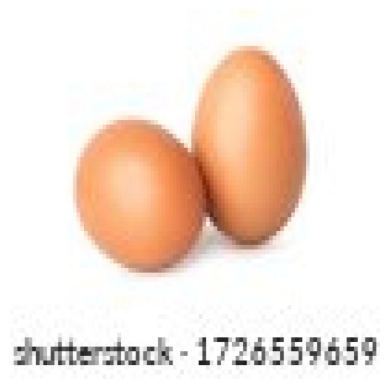

Error decoding JSON: Expecting value: line 1 column 1 (char 0)
Raw response content: b'<!DOCTYPE html>\n<html>\n<head>\n    <title>Roboflow Demo</title>\n\n    <meta name="viewport" content="width=640, user-scalable=no" />\n    <meta name="robots" content="noindex">\n\n    <script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.5.1/jquery.min.js" integrity="sha512-bLT0Qm9VnAYZDflyKcBaQ2gg0hSYNQrJ8RilYldYQ1FxQYoCLtUjuuRuZo+fjqhx/qtq/1itJ0C2ejDxltZVFg==" crossorigin="anonymous"></script>\n    <script src="https://cdnjs.cloudflare.com/ajax/libs/lodash.js/4.17.20/lodash.min.js" integrity="sha512-90vH1Z83AJY9DmlWa8WkjkV79yfS2n2Oxhsi2dZbIv0nC4E6m5AbH8Nh156kkM7JePmqD6tcZsfad1ueoaovww==" crossorigin="anonymous"></script>\n    <script src="https://cdnjs.cloudflare.com/ajax/libs/handlebars.js/4.7.6/handlebars.min.js" integrity="sha512-zT3zHcFYbQwjHdKjCu6OMmETx8fJA9S7E6W7kBeFxultf75OPTYUJigEKX58qgyQMi1m1EgenfjMXlRZG8BXaw==" crossorigin="anonymous"></script>\n    <script src="https://cdnjs.cl

In [4]:
# Install necessary packages if not already installed
!pip install requests matplotlib Pillow

# Import required libraries
import requests
from PIL import Image
import matplotlib.pyplot as plt

# Define the URL of the hosted model API
model_url = "https://demo.roboflow.com/egg-quality-grading-wlgy5/1?publishable_key=rf_N9kqq5pOoLfo1pcbAs6NIHMs7If2"

# Example image path (replace with your image path)
image_path = '/content/test/images/003_jpg.rf.4441818b95b5f85da8da8ccabff395d5.jpg'  # Replace this with the actual path to your test image

# Display the test image
try:
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error opening image: {e}")

# Upload the image to the model and get the predictions
try:
    with open(image_path, 'rb') as image_file:
        response = requests.post(
            f"{model_url}&format=json",  # Using JSON format for response
            files={"file": image_file}
        )

    # Check the status code of the response
    if response.status_code == 200:
        try:
            # Parse the response as JSON
            predictions = response.json()
            print("Predictions:", predictions)
        except requests.exceptions.JSONDecodeError as json_err:
            print("Error decoding JSON:", json_err)
            print("Raw response content:", response.content)  # Print raw response for debugging
    else:
        print(f"Error: Received status code {response.status_code}")
        print("Response content:", response.content)  # Print response content for further inspection

except Exception as e:
    print(f"Error during the request: {e}")


In [5]:
# Install requests if not already installed
!pip install requests

# Import the necessary module
import requests

# Define the API URL and your API key
api_url = "https://detect.roboflow.com/egg-quality-grading-wlgy5/1"  # Replace with your correct endpoint URL
api_key = "zrXu8gifgzGpSisXSEbn"  # Replace with the new valid API key

# Path to the image you want to infer
image_path = "/content/test/images/003_jpg.rf.4441818b95b5f85da8da8ccabff395d5.jpg"  # Replace with your image path

# Define the parameters for the request
params = {
    "api_key": api_key,
    "format": "json",           # Ensure the response is in JSON format
    "confidence": 20  # Lower the confidence threshold to 20%
}

# Perform the inference
try:
    # Open the image file
    with open(image_path, "rb") as image_file:
        # Send the POST request to the API with the image file
        response = requests.post(
            api_url,
            params=params,
            files={"file": image_file}
        )

    # Check if the response is successful
    if response.status_code == 200:
        # Parse the JSON response
        predictions = response.json()
        print("Predictions:", predictions)

        # Check if predictions are empty or not
        if predictions.get('predictions'):
            # Print details about each prediction
            for prediction in predictions['predictions']:
                print(f"Class: {prediction['class']}, Confidence: {prediction['confidence']}, "
                      f"Bounding Box: {prediction['x']}, {prediction['y']}, "
                      f"Width: {prediction['width']}, Height: {prediction['height']}")
        else:
            print("No predictions found in the image.")

    else:
        # Print error if response is not successful
        print(f"Error: Received status code {response.status_code}")
        print("Response content:", response.content)

except Exception as e:
    print(f"Error during the request: {e}")


Predictions: {'inference_id': '7047f54b-4e5a-4610-8450-de1964f1fd0f', 'time': 0.05116010400001869, 'image': {'width': 640, 'height': 640}, 'predictions': [{'x': 316.5, 'y': 248.0, 'width': 513.0, 'height': 460.0, 'confidence': 0.5764420032501221, 'class': 'Brown Eggs', 'class_id': 2, 'detection_id': 'f41dd794-4605-4ca5-9198-4e484ca94511'}]}
Class: Brown Eggs, Confidence: 0.5764420032501221, Bounding Box: 316.5, 248.0, Width: 513.0, Height: 460.0


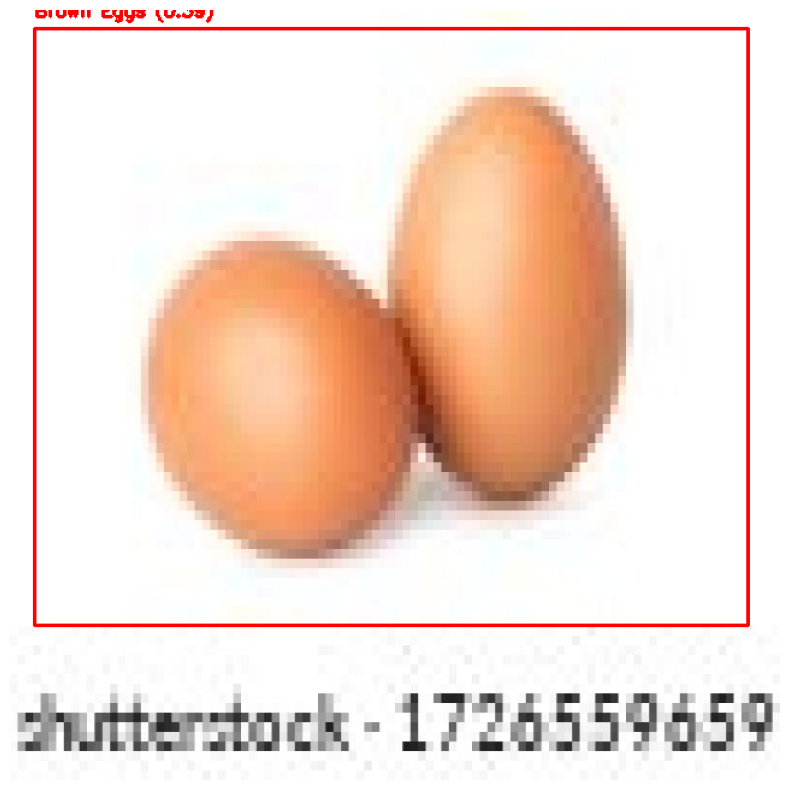

In [6]:
# Import necessary libraries for image processing
import cv2
import matplotlib.pyplot as plt

# Define a function to draw bounding boxes on the image
def draw_bounding_boxes(image_path, predictions):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Define colors for different classes (you can adjust colors as needed)
    colors = {
        'Brown Eggs': (255, 0, 0),  # Red
        'White Eggs': (0, 255, 0),  # Green
        'Calcium Deposited Eggs': (0, 0, 255),  # Blue
        'Blood Stained Eggs': (255, 255, 0),  # Cyan
        'Dirt Stained Eggs': (255, 165, 0),  # Orange
        'Invalid': (128, 0, 128),  # Purple
        'Eggs': (0, 255, 255)  # Yellow
    }

    # Iterate through all predictions and draw bounding boxes
    for prediction in predictions.get('predictions', []):
        # Get the bounding box coordinates and size
        x, y = prediction['x'], prediction['y']
        width, height = prediction['width'], prediction['height']
        confidence = prediction['confidence']
        class_name = prediction['class']

        # Calculate top-left and bottom-right corners of the bounding box
        top_left = (int(x - width / 2), int(y - height / 2))
        bottom_right = (int(x + width / 2), int(y + height / 2))

        # Choose the color based on class, default to red if class is not in colors
        color = colors.get(class_name, (255, 0, 0))

        # Draw the bounding box on the image
        cv2.rectangle(image, top_left, bottom_right, color, 2)

        # Put the class name and confidence score on the bounding box
        cv2.putText(image, f"{class_name} ({confidence:.2f})",
                    (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, color, 2)

    # Display the image with bounding boxes using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Define the path to the image
image_path = "/content/test/images/003_jpg.rf.4441818b95b5f85da8da8ccabff395d5.jpg"

# Define the predictions variable as obtained from the inference response
predictions = {
    'inference_id': 'ac5b08d9-56c9-4425-a166-42edde7012ec',
    'time': 0.03040224600044894,
    'image': {'width': 640, 'height': 640},
    'predictions': [
        {
            'x': 316.5,
            'y': 263.0,
            'width': 593.0,
            'height': 496.0,
            'confidence': 0.38941413164138794,
            'class': 'Brown Eggs',
            'class_id': 2,
            'detection_id': '0ec48dce-0ec7-42ba-b1ac-f46f9161fc89'
        }
        # Add more predictions here as needed
    ]
}

# Call the function to draw bounding boxes and display the image
draw_bounding_boxes(image_path, predictions)

In [7]:
# Install necessary libraries
!pip install fpdf matplotlib seaborn pandas

# Import libraries for generating the report
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define the function to generate the report
def generate_model_report(predictions):
    # Initialize PDF
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Title
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, txt="Egg Quality Grading Model Report", ln=True, align="C")

    # Add general info
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt=f"Inference ID: {predictions.get('inference_id', 'N/A')}", ln=True, align="L")
    pdf.cell(200, 10, txt=f"Inference Time: {predictions.get('time', 'N/A'):.2f} seconds", ln=True, align="L")
    pdf.cell(200, 10, txt=f"Image Size: {predictions['image']['width']}x{predictions['image']['height']}", ln=True, align="L")

    # Prepare data for analysis
    classes = [pred['class'] for pred in predictions['predictions']]
    confidences = [pred['confidence'] for pred in predictions['predictions']]

    # Create a DataFrame for better visualization
    df = pd.DataFrame({
        "Class": classes,
        "Confidence": confidences
    })

    # Add statistics about predictions
    pdf.cell(200, 10, txt="Statistics", ln=True, align="L")
    stats = df.describe().to_string()
    pdf.set_font("Arial", size=10)
    pdf.multi_cell(0, 10, stats)

    # Save plot of confidence scores
    plt.figure(figsize=(10, 6))
    sns.histplot(confidences, bins=10, kde=True)
    plt.title('Distribution of Confidence Scores')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig('/content/confidence_distribution.png')
    plt.close()

    # Add plot to PDF
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Confidence Score Distribution", ln=True, align="C")
    pdf.image('/content/confidence_distribution.png', x=10, y=30, w=180)

    # Confusion matrix (if available, here just a placeholder for example)
    # y_true and y_pred need to be defined based on your test set and model predictions
    # y_true = [...]  # Ground truth labels
    # y_pred = [...]  # Predicted labels
    # cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title('Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.savefig('/content/confusion_matrix.png')
    # plt.close()

    # Add confusion matrix to PDF (if used)
    # pdf.add_page()
    # pdf.set_font("Arial", size=12)
    # pdf.cell(200, 10, txt="Confusion Matrix", ln=True, align="C")
    # pdf.image('/content/confusion_matrix.png', x=10, y=30, w=180)

    # Save the PDF
    pdf_path = "/content/model_report.pdf"
    pdf.output(pdf_path)
    print(f"Report generated and saved as {pdf_path}")

# Generate the report
generate_model_report(predictions)

# Provide a download link for the report
from google.colab import files
files.download("/content/model_report.pdf")


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=3e0b29fe8a6b7bcb710d11fe5b9e3087fc865eb9224d111dc9b785fab6691a2c
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
Report generated and saved as /content/model_report.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Install GitPython
!pip install gitpython


In [10]:
# Set up GitHub authentication
from getpass import getpass
import os

# Ask for your GitHub username and token
username = input('Enter your GitHub username: ')
token = getpass('Enter your GitHub personal access token: ')

# Configure Git with your credentials
os.system(f'git config --global user.name "{username}"')
os.system(f'git config --global user.email "{username}@users.noreply.github.com"')


Enter your GitHub username: VartikaRaj2512
Enter your GitHub personal access token: ··········


0